# Fantasy Premier League Season 2019/2020

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 10000

In [3]:
df = pd.read_csv('data/fbl_3_2020.csv')

In [4]:
df.head()

,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,teamId,ppda_cal,allowed_ppda,matchtime,tot_points,round,tot_goal,tot_con,Referee.x,HS.x,HST.x,HF.x,HC.x,HY.x,HR.x,AS.x,AST.x,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,2.3863,w,2019-08-09 20:00:00,1,0,0,3,1.392153,Liverpool,5.942857,21.454545,20,3,1,4,1,M Oliver,15,7,9,11,0,0,12,5,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,0.4405,l,2019-08-09 20:00:00,0,0,1,0,-1.392153,Norwich,21.454545,5.942857,20,0,1,1,4,M Oliver,15,7,9,11,0,0,12,5,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,2.6312,w,2019-08-10 12:30:00,1,0,0,3,1.222340,Man City,6.935484,16.400000,12,3,1,5,0,M Dean,5,3,6,1,2,0,14,9,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,0.2522,l,2019-08-10 12:30:00,0,0,1,0,-1.222340,West Ham,16.400000,6.935484,12,0,1,0,5,M Dean,5,3,6,1,2,0,14,9,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,1.0172,d,2019-08-10 15:00:00,0,1,0,1,-0.257650,Bournemouth,13.600000,9.133333,15,1,1,1,1,K Friend,13,3,10,3,2,0,8,3,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


In [7]:
df.shape

(576, 45)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    576 non-null    int64  
 1   h_a           576 non-null    object 
 2   xG            576 non-null    float64
 3   xGA           576 non-null    float64
 4   npxG          576 non-null    float64
 5   npxGA         576 non-null    float64
 6   deep          576 non-null    int64  
 7   deep_allowed  576 non-null    int64  
 8   scored        576 non-null    int64  
 9   missed        576 non-null    int64  
 10  xpts          576 non-null    float64
 11  result        576 non-null    object 
 12  date          576 non-null    object 
 13  wins          576 non-null    int64  
 14  draws         576 non-null    int64  
 15  loses         576 non-null    int64  
 16  pts           576 non-null    int64  
 17  npxGD         576 non-null    float64
 18  teamId        576 non-null    

In [31]:
columns_to_select = ['assists', 'clean_sheets', 'creativity', 'goals_scored', 'influence', 'kickoff_time', 'opponent_team',\
                     'full', 'team', 'total_points', 'round']

In [32]:
df = df[columns_to_select]

In [33]:
df.head()

,assists,clean_sheets,creativity,goals_scored,influence,kickoff_time,opponent_team,full,team,total_points,round
0,0,0,0.1,0,0.2,2019-08-31 14:00:00,Man City,Aaron Connolly,Brighton,1,4
1,0,0,0.3,0,1.0,2019-09-14 14:00:00,Burnley,Aaron Connolly,Brighton,1,5
2,0,0,4.8,0,2.0,2019-09-21 16:30:00,Newcastle United,Aaron Connolly,Brighton,1,6
3,0,0,0.6,0,0.2,2019-09-28 14:00:00,Chelsea,Aaron Connolly,Brighton,1,7
4,0,1,23.8,2,70.2,2019-10-05 11:30:00,Tottenham,Aaron Connolly,Brighton,13,8


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22502 entries, 0 to 22501
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   assists        22502 non-null  int64  
 1   clean_sheets   22502 non-null  int64  
 2   creativity     22502 non-null  float64
 3   goals_scored   22502 non-null  int64  
 4   influence      22502 non-null  float64
 5   kickoff_time   22502 non-null  object 
 6   opponent_team  22502 non-null  object 
 7   full           22502 non-null  object 
 8   team           22502 non-null  object 
 9   total_points   22502 non-null  int64  
 10  round          22502 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.9+ MB


In [35]:
df.describe()

,assists,clean_sheets,creativity,goals_scored,influence,total_points,round
count,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000
mean,0.040041,0.104302,4.848378,0.044485,7.396116,1.378189,20.339925
std,0.211752,0.305658,10.832486,0.230016,12.883909,2.502970,10.974059
min,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,0.000000,2.800000,0.000000,11.200000,2.000000,30.000000
max,3.000000,1.000000,133.500000,4.000000,144.000000,26.000000,38.000000


In [36]:
df['assists'].unique()

array([0, 2, 1, 3], dtype=int64)

In [37]:
df['clean_sheets'].unique()

array([0, 1], dtype=int64)

In [38]:
df['goals_scored'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [39]:
df['team'].nunique()

20

In [40]:
df['opponent_team'].nunique()

20

In [41]:
df['full'].nunique() # number of players

666

In [43]:
df['round'].nunique()

38

## Visualize Points for player

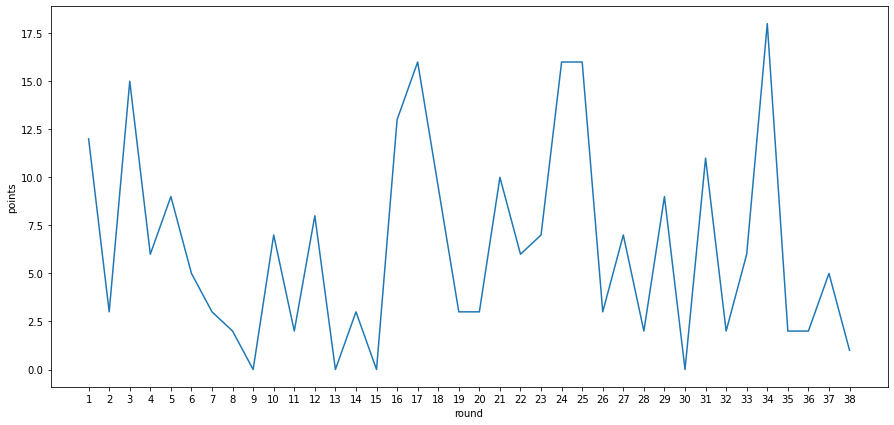

In [51]:
_ = plt.figure(figsize=(15,7))
df[df['full'] == 'Mohamed Salah'].groupby('round').sum()['total_points'].plot()
_ = plt.xticks(np.arange(1,39))
_ = plt.ylabel('points')
plt.show()

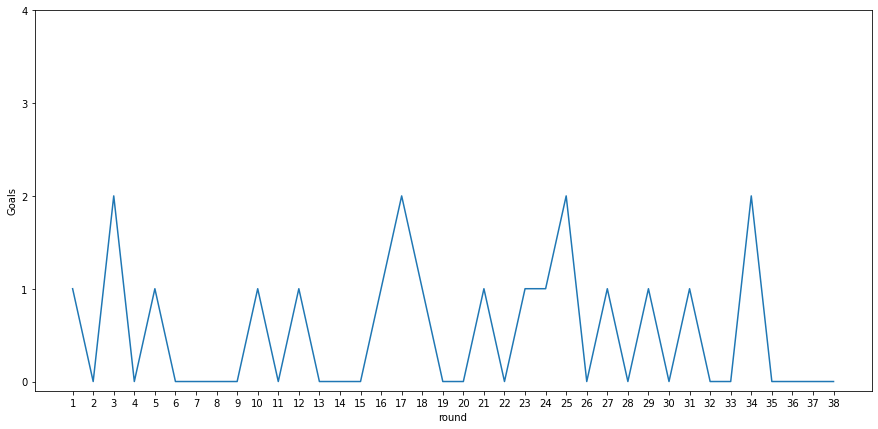

In [59]:
_ = plt.figure(figsize=(15,7))
df[df['full'] == 'Mohamed Salah'].groupby('round').sum()['goals_scored'].plot()
#(df[df['full'] == 'Mohamed Salah'].groupby('round').sum()['creativity'] / 10).plot()
_ = plt.xticks(np.arange(1,39))
_ = plt.yticks(np.arange(5))
_ = plt.ylabel('Goals')
plt.show()

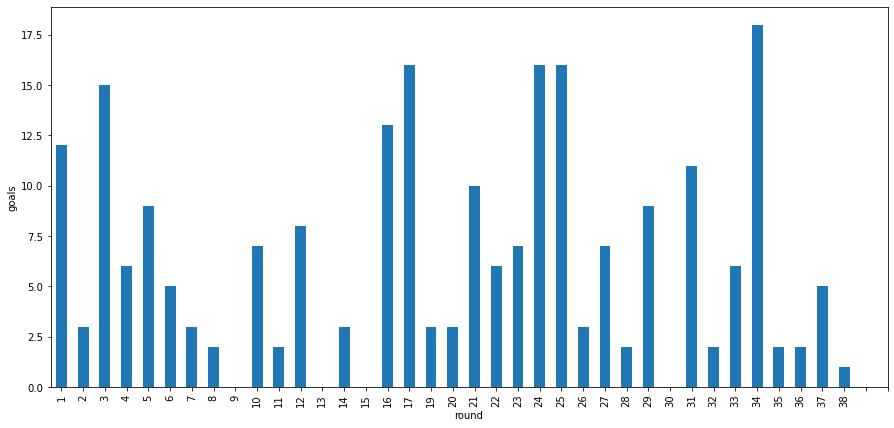

In [61]:
# df[df['player_name'] == 'Mohamed Salah'].plot(x='round', y='total_points')
_ = plt.figure(figsize=(15,7))
df[df['full'] == 'Mohamed Salah'].groupby('round').sum()['total_points'].plot(kind='bar')
_ = plt.xticks(np.arange(39))
_ = plt.ylabel('goals')
plt.show()

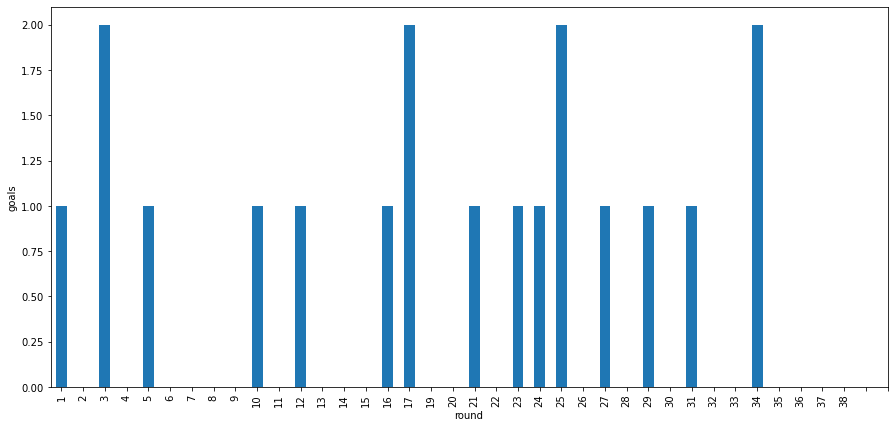

In [60]:
# df[df['player_name'] == 'Mohamed Salah'].plot(x='round', y='total_points')
_ = plt.figure(figsize=(15,7))
df[df['full'] == 'Mohamed Salah'].groupby('round').sum()['goals_scored'].plot(kind='bar')
_ = plt.xticks(np.arange(39))
_ = plt.ylabel('goals')
plt.show()

## Top Ten Teams for total points

<AxesSubplot:xlabel='team'>

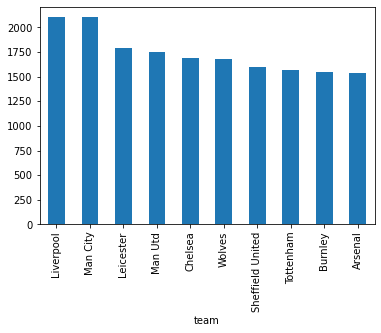

In [65]:
df.groupby('team').sum()['total_points'].sort_values(ascending=False)[0:10].plot(kind='bar')

## Top Ten Players for total points

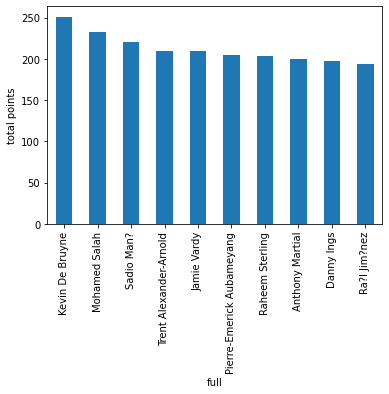

In [66]:
df.groupby('full').sum()['total_points'].sort_values(ascending=False)[0:10].plot(kind='bar')
_ = plt.ylabel('total points')

## Top Ten Teams for Goals

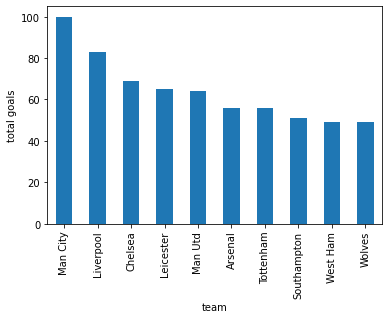

In [67]:
df.groupby('team').sum()['goals_scored'].sort_values(ascending=False)[0:10].plot(kind='bar')
_ = plt.ylabel('total goals')

## Top Ten Players for Goals

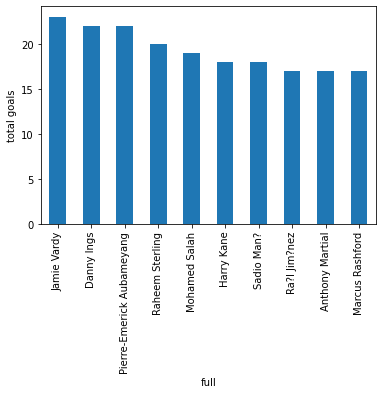

In [68]:
df.groupby('full').sum()['goals_scored'].sort_values(ascending=False)[0:10].plot(kind='bar')
_ = plt.ylabel('total goals')

## Top Ten Players for Assists

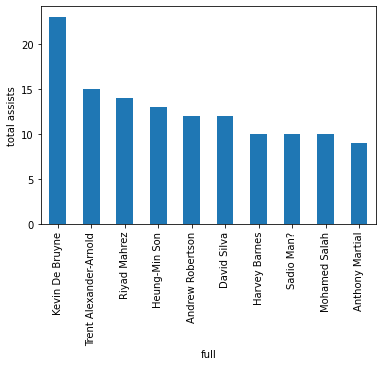

In [69]:
df.groupby('full').sum()['assists'].sort_values(ascending=False)[0:10].plot(kind='bar')
_ = plt.ylabel('total assists')

## notes
- put number above each bar in bar chart
- choose colors